In [1]:
import pandas as pd
import numpy as np


In [2]:
!pip install scikit-learn

In [3]:
#Model preprocessin + cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV



from sklearn.model_selection import RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [4]:
#classification algorithms + metrics 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import 

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [5]:
play_predictor_df = pd.read_csv('/content/drive/My Drive/PlayPredictor.csv')

In [6]:
play_predictor_df

,yardline_100,quarter_seconds_remaining,qtr,down,ydstogo,play_type,shotgun,no_huddle,third_down_converted,third_down_failed,pass_touchdown,rush_touchdown,return_touchdown,safety
0,30.0,900.0,1,NaN,0,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,58.0,893.0,1,1.0,10,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,53.0,856.0,1,2.0,5,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,56.0,815.0,1,3.0,8,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0
4,56.0,807.0,1,4.0,8,4,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449366,66.0,63.0,4,2.0,10,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0
449367,66.0,58.0,4,3.0,10,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0
449368,61.0,38.0,4,4.0,5,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0
449369,39.0,35.0,4,1.0,10,7,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
play_predictor_features = play_predictor_df.drop('play_type', axis=1)

play_predictor_target = play_predictor_df.play_type.values

In [8]:
play_predictor_features.shape

(449371, 13)

In [9]:
play_predictor_target.shape

(449371,)

In [10]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')

imp.fit(play_predictor_features)

play_predictor_features = imp.transform(play_predictor_features)

In [11]:
play_predictor_X_train, play_predictor_X_test, play_predictor_y_train, play_predictor_y_test = train_test_split(play_predictor_features, play_predictor_target, test_size=0.3, random_state=42)

In [12]:
play_predictor_X_train.shape

(314559, 13)

In [13]:
np.any(np.isnan(play_predictor_X_train))

False

In [14]:
np.any(np.isnan(play_predictor_y_train))

False

In [15]:
rand_forest_play_predictor = RandomForestClassifier()


sgd_play_predictor = SGDClassifier()

In [16]:
rand_forest_play_predictor_steps = [('scaler', StandardScaler()), ('rand_forest_play_predictor', RandomForestClassifier())]


sgd_play_predictor_steps = [('scaler', StandardScaler()), ('sgd_play_predictor', SGDClassifier())]

In [17]:
rand_forest_play_predictor_pipeline = Pipeline(rand_forest_play_predictor_steps)


sgd_play_predictor_pipeline = Pipeline(sgd_play_predictor_steps)

In [18]:
rand_forest_play_predictor_pipeline.fit(play_predictor_X_train, play_predictor_y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rand_forest_play_predictor',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False

In [19]:
sgd_play_predictor_pipeline.fit(play_predictor_X_train, play_predictor_y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgd_play_predictor',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

In [20]:
rand_forest_play_predictions = rand_forest_play_predictor_pipeline.predict(play_predictor_X_test)

In [21]:
sgd_play_predictions = sgd_play_predictor_pipeline.predict(play_predictor_X_test)

In [22]:
rand_forest_play_prediction_accuracy = accuracy_score(play_predictor_y_test, rand_forest_play_predictions)



sgd_play_prediction_accuracy = accuracy_score(play_predictor_y_test, sgd_play_predictions)

In [23]:
rand_forest_play_prediction_report = classification_report(play_predictor_y_test, rand_forest_play_predictions)



sgd_play_prediction_report = classification_report(play_predictor_y_test, sgd_play_predictions)

In [24]:
print("RandomForestClassifier accuracy: {}".format(rand_forest_play_prediction_accuracy))
print()
print("RandomForestClassifier classification report")
print()
print(rand_forest_play_prediction_report)


print()
print()



print("SGDClassifier accuracy: {}".format(sgd_play_prediction_accuracy))
print()
print("SGDClassifier classification report")
print()
print(sgd_play_prediction_report)


RandomForestClassifier accuracy: 0.7087128742248464

RandomForestClassifier classification report

              precision    recall  f1-score   support

           0       0.69      0.74      0.71     55945
           1       0.59      0.57      0.58     39956
           2       0.72      0.54      0.62     12793
           3       0.97      0.98      0.97      7668
           4       0.92      0.98      0.95      7133
           5       0.88      0.91      0.90      3286
           6       0.88      0.93      0.90      2892
           7       0.69      0.76      0.73      1099
           8       0.46      0.32      0.38       208
           9       0.98      0.96      0.97      3832

    accuracy                           0.71    134812
   macro avg       0.78      0.77      0.77    134812
weighted avg       0.71      0.71      0.71    134812



SGDClassifier accuracy: 0.6721582648428923

SGDClassifier classification report

              precision    recall  f1-score   support

    

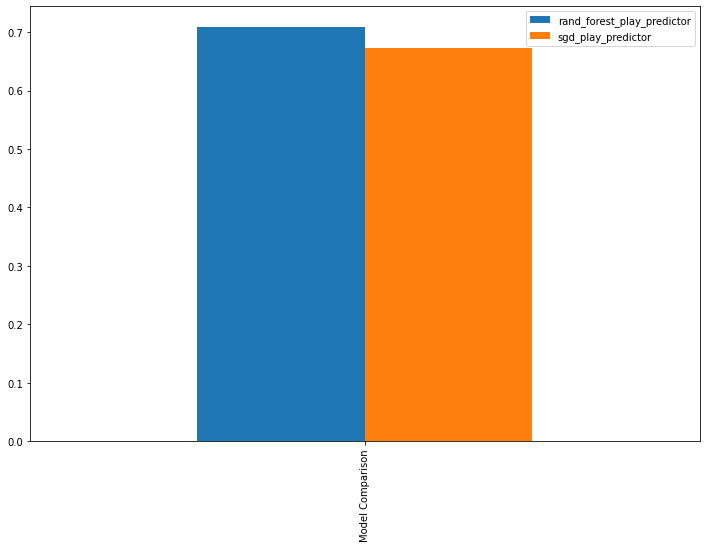

In [25]:
comparison = {'rand_forest_play_predictor':rand_forest_play_prediction_accuracy, 
            'sgd_play_predictor':sgd_play_prediction_accuracy}

compare_metrics = pd.DataFrame(data=comparison, index=['Model Comparison'])

compare_metrics.plot.bar(figsize=(12,8))


In [26]:
predictive_features_df = pd.DataFrame(play_predictor_features)

In [27]:
results_df = pd.DataFrame({"Actual_Play_Type":play_predictor_y_test, "Predicted_Play_Type":rand_forest_play_predictions})

In [28]:
results_df

,Actual_Play_Type,Predicted_Play_Type
0,1,0
1,0,1
2,0,0
3,1,1
4,0,0
...,...,...
134807,1,1
134808,5,5
134809,0,2
134810,3,3


In [29]:
results_df['Actual_Play_Type'] = results_df.Actual_Play_Type.apply(lambda row: 
                                                 'pass' if row == 0 
                                                 else 'run' if row == 1 
                                                 else 'no_play' if row == 2
                                                 else 'kickoff' if row == 3 
                                                 else 'punt' if row == 4 
                                                 else 'extra_point' if row == 5
                                                 else 'field_goal' if row == 6
                                                 else 'qb_kneel' if row == 7
                                                 else 'qb_spike' if row == 8
                                                 else 9)


In [30]:
results_df['Predicted_Play_Type'] = results_df.Predicted_Play_Type.apply(lambda row: 
                                                 'pass' if row == 0 
                                                 else 'run' if row == 1 
                                                 else 'no_play' if row == 2
                                                 else 'kickoff' if row == 3 
                                                 else 'punt' if row == 4 
                                                 else 'extra_point' if row == 5
                                                 else 'field_goal' if row == 6
                                                 else 'qb_kneel' if row == 7
                                                 else 'qb_spike' if row == 8
                                                 else 9)

In [31]:
results_df

,Actual_Play_Type,Predicted_Play_Type
0,run,pass
1,pass,run
2,pass,pass
3,run,run
4,pass,pass
...,...,...
134807,run,run
134808,extra_point,extra_point
134809,pass,no_play
134810,kickoff,kickoff


In [ ]:
#DUE TO TIME CONSTRAINTS I DID NOT GET TO HYPERPARAMETER TUNING AND CROSS VALIDATION OF THE MODEL